### Class practice on 18/06/2024 - Advanced python programming
##### Prajwal Luitel (C0927658)

#### Use python modules to discretize a feature

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import Binarizer
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

%matplotlib inline

In [3]:
age = np.array([[6],[12],[20],[36],[65]])

In [7]:
binarizer = Binarizer(threshold=18)

In [8]:
binarizer.fit_transform(age)

array([[0],
       [0],
       [1],
       [1],
       [1]])

Note: Recursive Feature Elimination

In [9]:
np.digitize(age, bins=[20,30,64])

array([[0],
       [0],
       [1],
       [2],
       [3]])

### Use python modules to cluster observations

In [11]:
clusterer = KMeans(3, random_state=0)

In [12]:
features, original_class = make_blobs(n_samples=50, n_features=2, centers = 3, random_state=1)

In [13]:
clusterer.fit(features)

KMeans(n_clusters=3, random_state=0)

In [15]:
dataframe = pd.DataFrame(features, columns=["feature_1", "feature_2"])
dataframe['group'] = clusterer.predict(features)
dataframe['original_class'] = original_class
dataframe.head()

,feature_1,feature_2,group,original_class
0,-9.877554,-3.336145,2,1
1,-7.287210,-8.353986,0,2
2,-6.943061,-7.023744,0,2
3,-7.440167,-8.791959,0,2
4,-6.641388,-8.075888,0,2


In [17]:
pd.crosstab(dataframe['group'], dataframe['original_class'],margins=True, margins_name="Total")

original_class,0,1,2,Total
group,,,,
0,0,0,16,16
1,17,0,0,17
2,0,17,0,17
Total,17,17,16,50


#### Elbow method

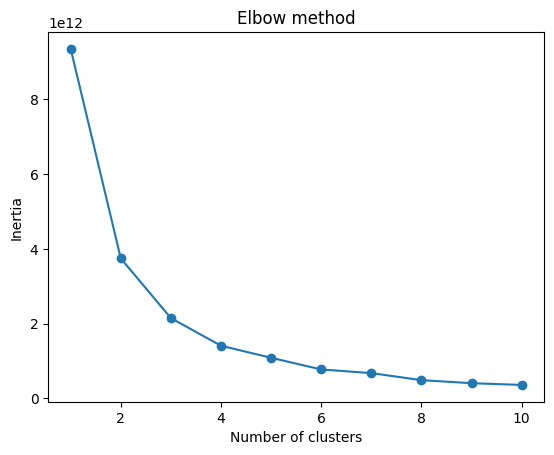

In [23]:

inertias = []

df = pd.read_csv('Practice_File.csv')
data = list(zip(df['LotArea'], df['SalePrice']))

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

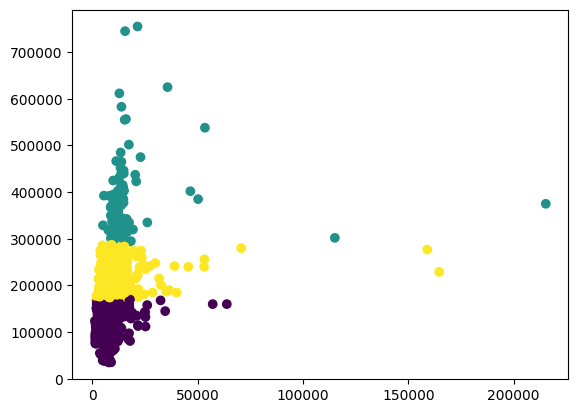

In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(df['LotArea'], df['SalePrice'], c=kmeans.labels_)
plt.show()

In [26]:
data = df[['LotArea', 'SalePrice', 'GrLivArea']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

df['Cluster'] = kmeans.labels_

fig = px.scatter_3d(
    df, 
    x='LotArea', 
    y='SalePrice', 
    z='GrLivArea', 
    color='Cluster',
    title='3D Scatter plot with KMeans Clustering'
)

fig.show()


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import plotly.express as px

df = pd.read_csv("Practice_File.csv")

train, test = train_test_split(df, test_size=0.2, random_state=0)

# Fit KMeans on the training set
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(train[['LotArea', 'SalePrice']])

# Add cluster labels to the training set
train['Cluster'] = kmeans.labels_

# Predict cluster labels for the test set
test['Cluster'] = kmeans.predict(test[['LotArea', 'SalePrice']])

# Combine train and test sets for visualization
combined = pd.concat([train, test], ignore_index=True)

# Create a scatter plot
fig = px.scatter(
    combined, 
    x='LotArea', 
    y='SalePrice',  
    color='Cluster',
    title='Scatter plot with KMeans Clustering',
    symbol=combined.index.isin(test.index),
    size=np.where(combined.index.isin(test.index), 10, 5)
)

fig.show()
